1. What is the total amount each customer spent at the restaurant?

In [ ]:
select a.customer_id, sum(b.price)
from dannys_diner.sales a join dannys_diner.menu b
on a.product_id = b.product_id
group by 1

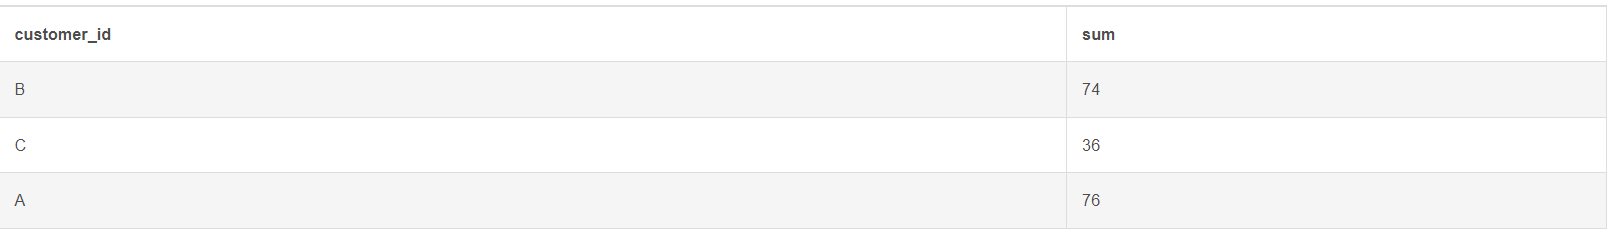

2. How many days has each customer visited the restaurant?

select customer_id, count(distinct order_date)
from dannys_diner.sales
group by 1

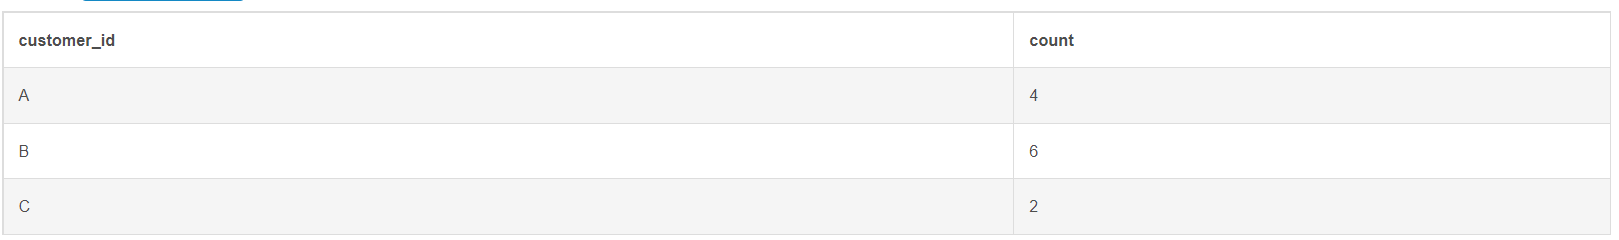

 3. What was the first item from the menu purchased by each customer?

select * from (select customer_id, product_id,
rank() over (partition by customer_id order by order_date) as hii
from dannys_diner.sales) as bye
 where hii=1
group by 1,2,3

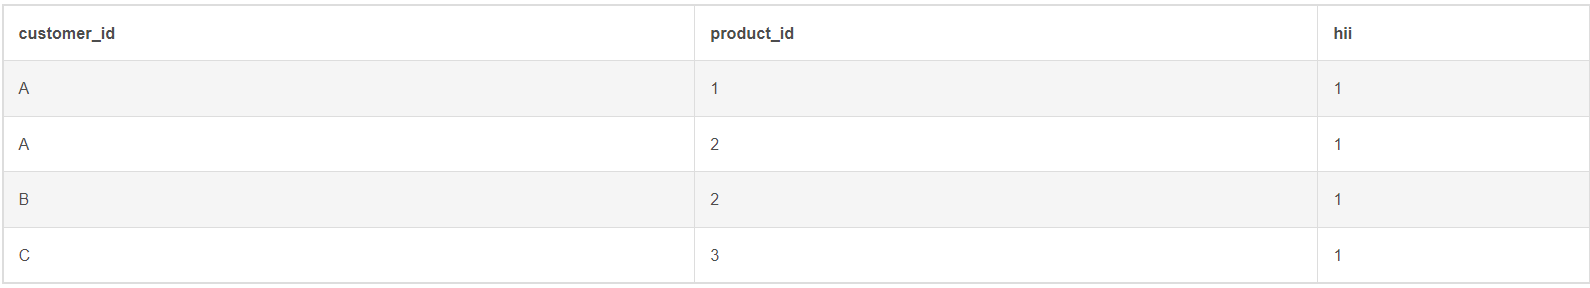

4. What is the most purchased item on the menu and how many times was it purchased by all customers?

select product_id, count(*) as coun
from dannys_diner.sales 
group by product_id
order by coun desc
limit 1

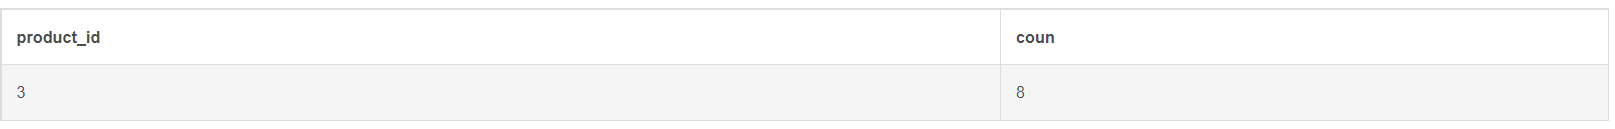

5. Which item was the most popular for each customer?

select customer_id, product_id, product_name from (
  select a.customer_id, a.product_id, b.product_name,
  rank() over (partition by a.customer_id order by count(a.product_id)) as hii
  from dannys_diner.sales a join dannys_diner.menu b
  on a.product_id = b.product_id
group by a.customer_id, a.product_id, b.product_name) as bye
  where hii = 1

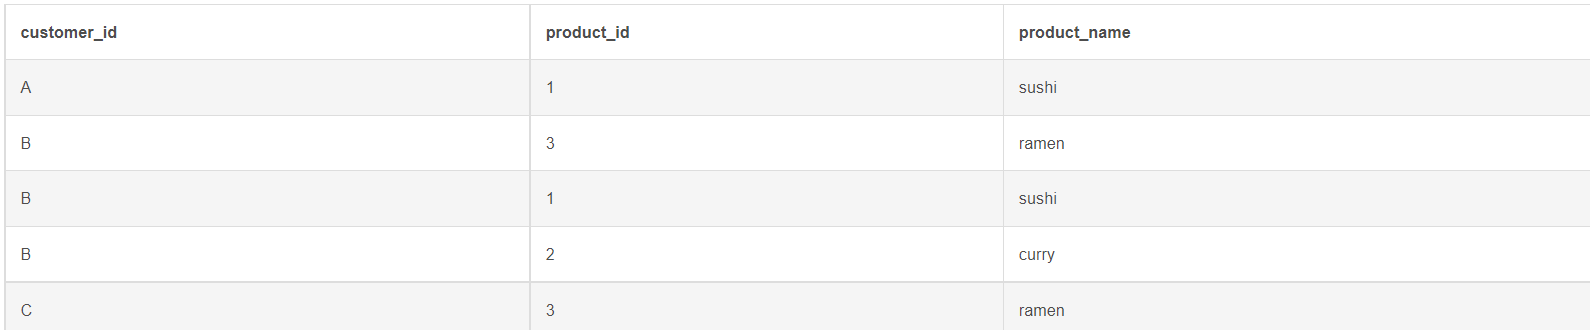

6. Which item was purchased first by the customer after they became a member?

select * from (select a.customer_id, a.product_id, b.join_date,
rank() over (partition by a.customer_id order by a.order_date) as hii
from dannys_diner.sales a join dannys_diner.members b
              on a.customer_id = b.customer_id
              where a.order_date >= b.join_date) as bye
where hii = 1

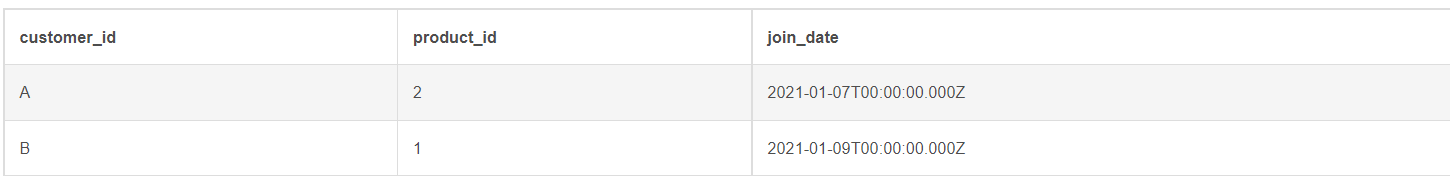

7. Which item was purchased just before the customer became a member?

select * from (select a.customer_id, a.product_id, b.join_date,
rank() over (partition by a.customer_id order by a.order_date desc) as hii
from dannys_diner.sales a join dannys_diner.members b
              on a.customer_id = b.customer_id
              where a.order_date < b.join_date) as bye
where hii = 1

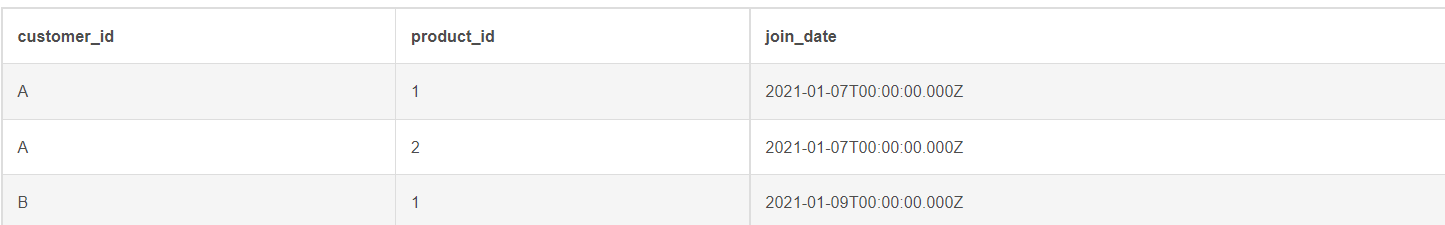

8. What is the total items and amount spent for each member before they became a member?

select a.customer_id, count(a.product_id), sum(b.price)
from dannys_diner.sales a join dannys_diner.menu b 
on a.product_id = b.product_id
join dannys_diner.members c
on a.customer_id = c.customer_id
where a.order_date < c.join_date
group by a.customer_id

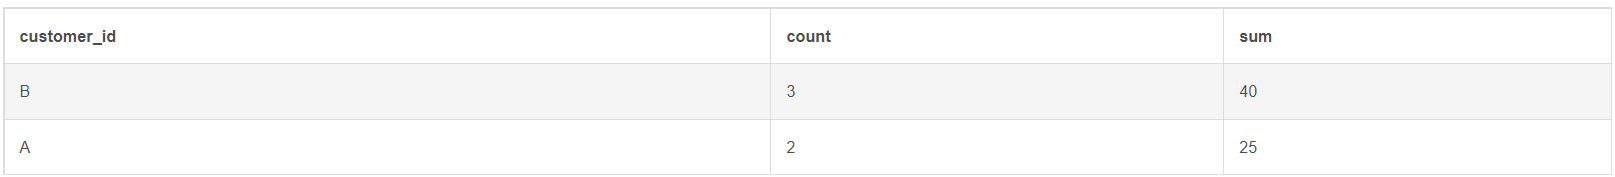

9.  If each $1 spent equates to 10 points and sushi has a 2x points multiplier - how many points would each customer have?

select a.customer_id,
sum(case when a.product_id = 1 then b.price*20 
else b.price*10
end) as points
from dannys_diner.sales a join dannys_diner.menu b
on a.product_id = b.product_id
group by a.customer_id

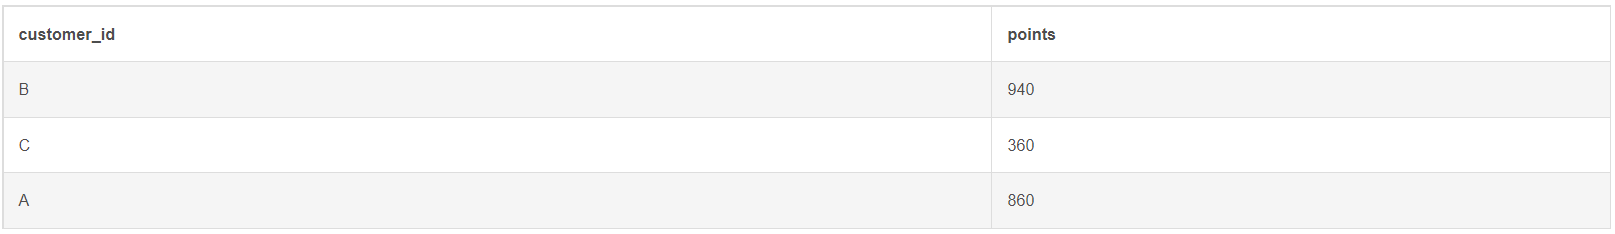

10. In the first week after a customer joins the program (including their join date) they earn 2x points on all items, not just sushi - how many points do customer A and B have at the end of January?


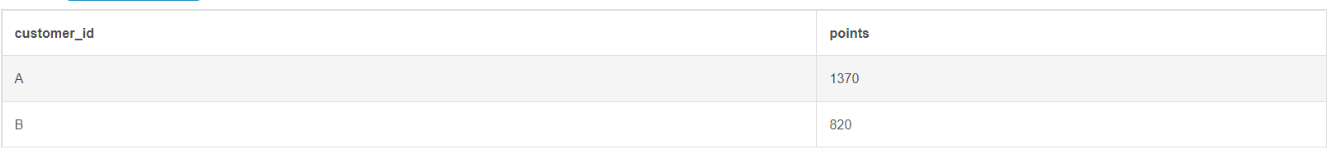